In [10]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mpt
import seaborn as sa
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("Churn_Modelling.csv")

In [53]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


 ## univariate analysis

In [23]:
teleco_new = df[["Geography","Gender","Exited"]]

In [24]:
teleco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


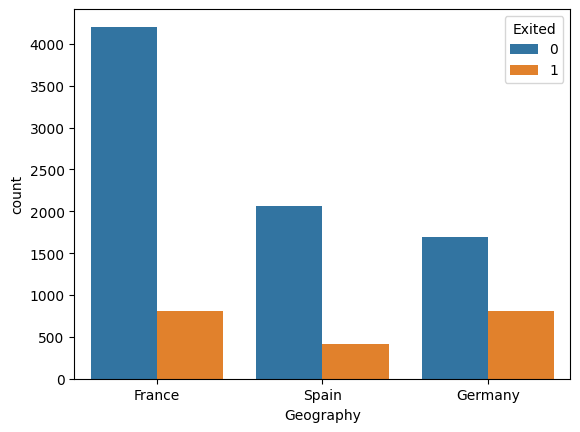

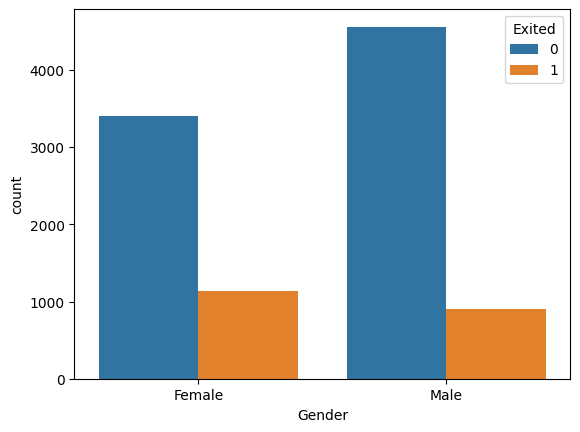

In [25]:

for i, predictor in enumerate(teleco_new.drop(columns="Exited")):
    plt.figure()
    sa.countplot(data=teleco_new, x=predictor, hue='Exited')
    


# bivariate analysis

<Axes: xlabel='Gender', ylabel='Count'>

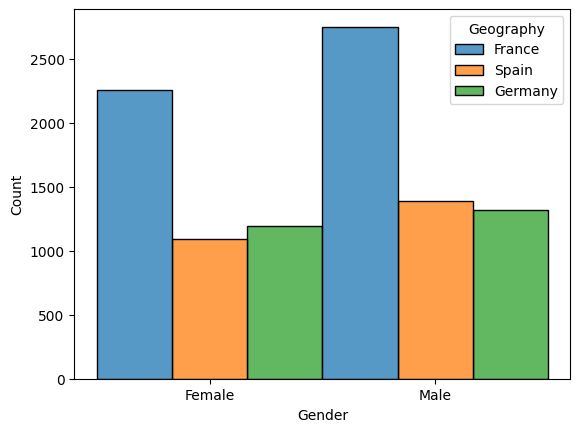

In [35]:
sa.histplot(x="Gender",hue="Geography",data=teleco_new, stat="count", multiple="dodge")

# churn customers analysis

In [42]:
churn_customers =teleco_new.loc[teleco_new['Exited']==1]

<Axes: xlabel='Gender', ylabel='Count'>

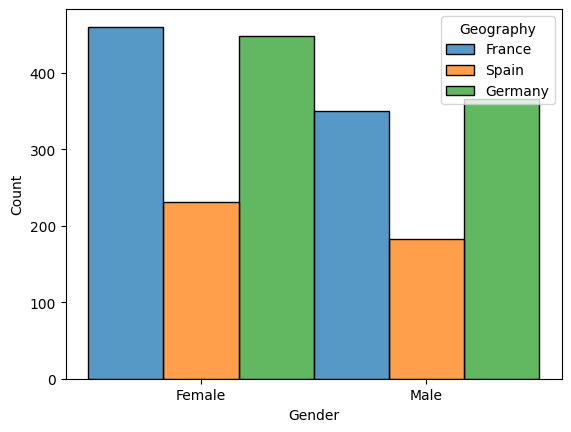

In [43]:
sa.histplot(x="Gender",hue="Geography",data=churn_customers, stat="count", multiple="dodge")

# numarical analysis
### correlation: ranges from -1 to +1

- +1---->  postitive correlation
- -1----->  negitive correlation   
- ~0------>  no correlation

In [72]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### correlation function doesn't exicutes columns which having flot and char data types 

 #### before performing the correlation operation drop the columns which are having char and flot datatypes 





In [75]:
df_base = df.drop(columns=['Surname','Geography','Gender'])

In [74]:
df_base.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

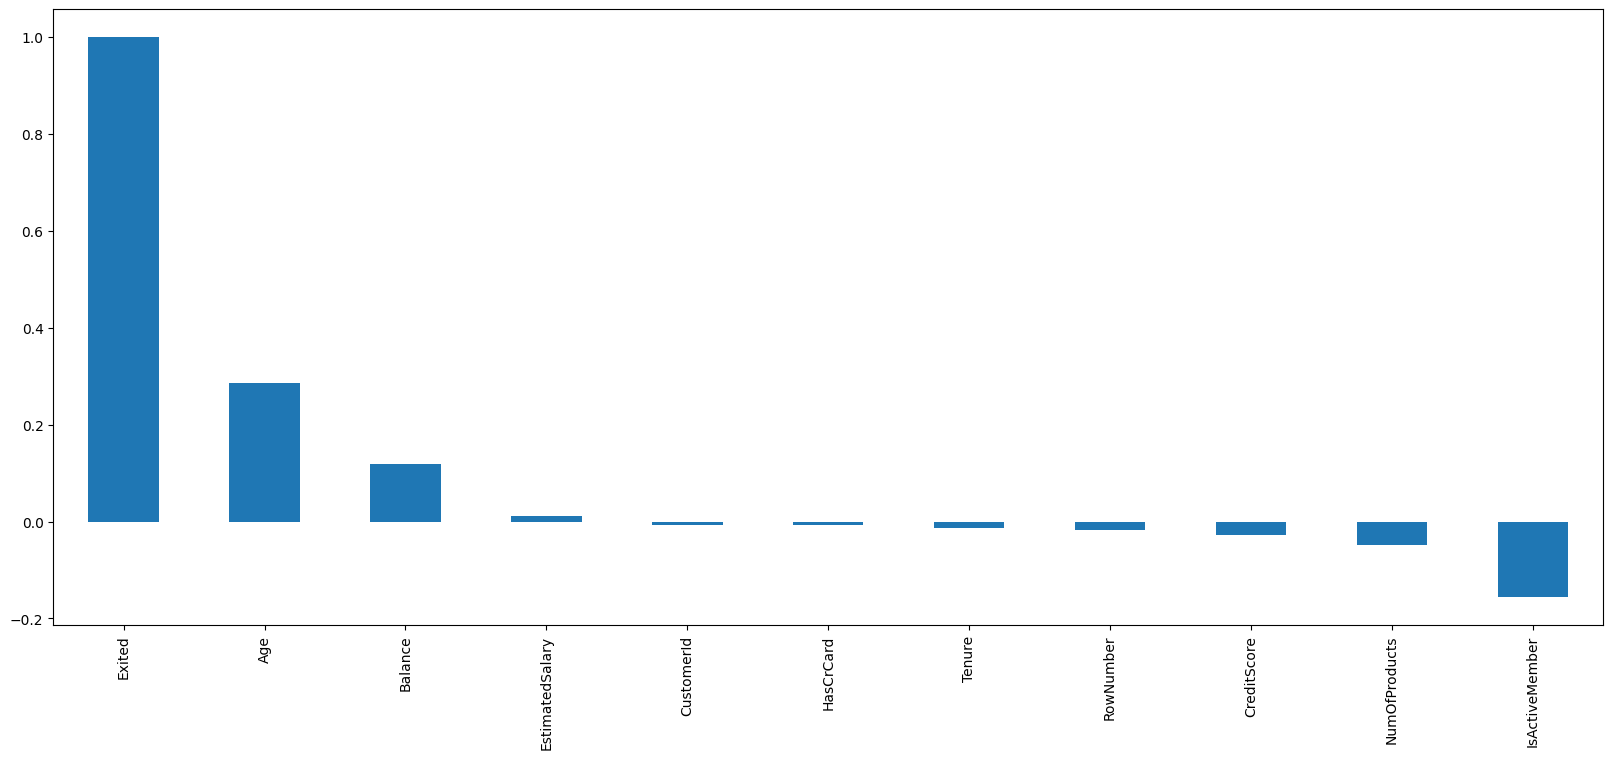

In [85]:
plt.figure(figsize=(20,8))
df_base.corr()["Exited"].sort_values(ascending=False).plot(kind= "bar")

####  From the bar plot of correlations, it seems that "Age" and "Balance" have positive correlations with the "Exited" variable, while the rest of the columns have correlations close to zero or negative correlations.

Positive correlation indicates that as the values of "Age" and "Balance" increase, the likelihood of a customer exiting also tends to increase. This suggests that older customers and those with higher account balances are more likely to churn (exit).

Based on this observation, you may want to consider "Age" and "Balance" as potentially important features in predicting customer churn ("Exited"). Further analysis, such as building predictive models or conducting additional statistical tests, could help validate the significance of these variables in predicting churn and provide insights for churn management strategies.

# heat map

<Axes: >

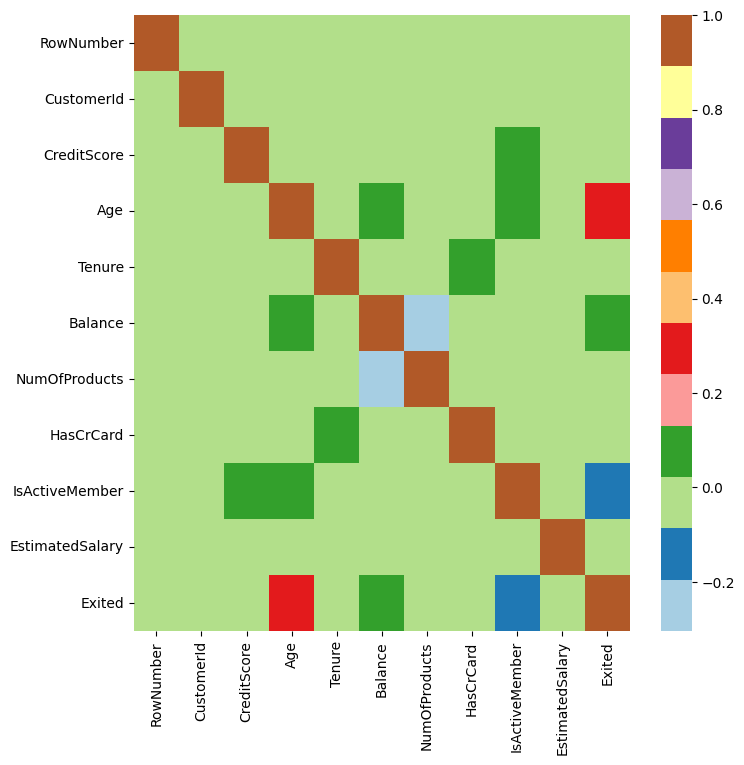

In [89]:


plt.figure(figsize=(8, 8))
sa.heatmap(df_base.corr(), cmap='Paired')



# line chart

<Axes: xlabel='Age'>

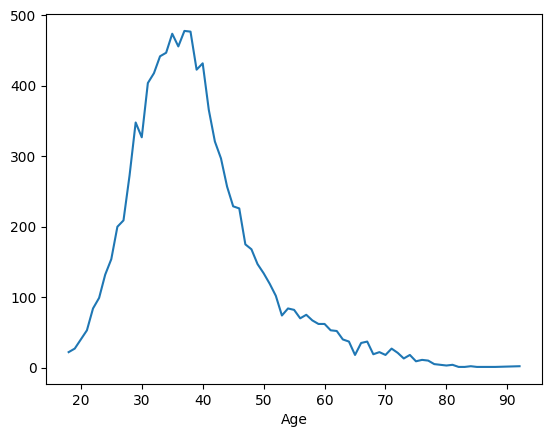

In [94]:
df_base['Age'].value_counts().sort_index(ascending=True).plot()

#### Based on the analysis of the data, it's observed that the majority of users fall within the age group of 28-40 years.

In [98]:
teleco_new1= df[['Age']]

In [100]:
churn_customers2 =teleco_new1.loc[teleco_new['Exited']==1]

<Axes: xlabel='Age'>

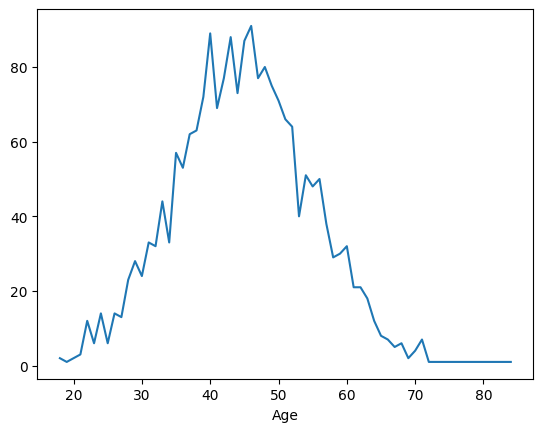

In [102]:
churn_customers2['Age'].value_counts().sort_index(ascending=True).plot()

### Based on the analysis of the data, it's observed that the majority of users who have churned fall within the age group of 40-50 years. This indicates that there is a significant portion of churned users concentrated within this age range.

# seaborn kdeplot

Text(0.5, 1.0, 'age by churn')

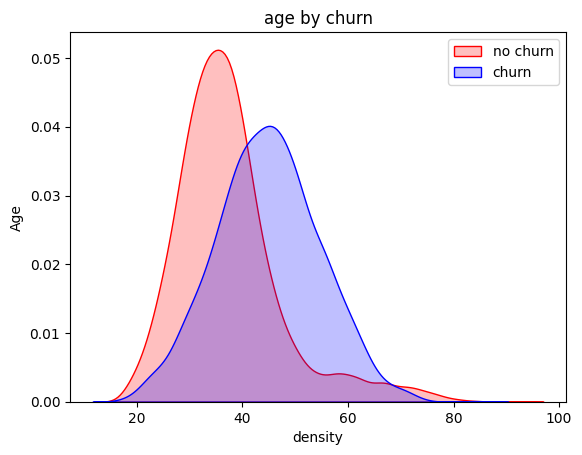

In [118]:
tot = sa.kdeplot(df.Age[(df['Exited']==0)],
                 color= 'red',fill=True)
                 
tot = sa.kdeplot(df.Age[(df['Exited']==1)],
                 color='blue',fill=True)
tot.legend(['no churn','churn'],loc = 'best')
tot.set_xlabel("density")
tot.set_ylabel ("Age")
tot.set_title("age by churn")
           
